In [109]:
import pandas as pd
import numpy as np 


In [110]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [111]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/visitgreece_search.tsv", sep='\t')

In [112]:
full_tweets_df.head()

Unnamed: 0  ... quoted_status
0           0  ...           NaN
1           1  ...           NaN
2           2  ...           NaN
3           3  ...           NaN
4           4  ...           NaN

[5 rows x 31 columns]

Ας φτιάξουμε ένα μικρότερο dataframe...

In [113]:
short_tweets = full_tweets_df[['created_at','text' ]]


In [114]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'text': 'text'} )

In [115]:
short_tweets.head()

date                                               text
0  Wed Jun 30 13:15:33 +0000 2021  Experience Kimolos with Aria Hotels! \nEnjoy t...
1  Wed Jun 30 12:30:12 +0000 2021  RT @WindyCityGreek: Visiting Veria, Greece’s b...
2  Wed Jun 30 12:21:21 +0000 2021  RT @Darmand15766004: #visitGreece #symi https:...
3  Wed Jun 30 12:21:18 +0000 2021  RT @Darmand15766004: #visitGreece #rodos https...
4  Wed Jun 30 12:19:15 +0000 2021        #visitGreece #rodos https://t.co/WXHMeqdg5i

In [116]:
short_tweets.tail()

date                                               text
668  Tue Jun 22 07:38:35 +0000 2021  The port of Alonissos at night! Time for a wal...
669  Tue Jun 22 07:10:59 +0000 2021  #lightsofmykonos #view #jmk\n\n#mykonos #mikon...
670  Tue Jun 22 07:04:57 +0000 2021  He needs to make his house in Greece covid-saf...
671  Tue Jun 22 06:56:27 +0000 2021  RT @VisitGreecegr: We have an announcement to ...
672  Tue Jun 22 06:11:19 +0000 2021  “If California were an island, it would be Cre...

In [117]:
short_tweets.dtypes

date    object
text    object
dtype: object

Ας μετατρέψουμε το string της ημερομηνίας σε datetime 

In [118]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')


In [119]:
short_tweets.dtypes

date    datetime64[ns]
text            object
dtype: object

In [120]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day


In [121]:
short_tweets.head()

date  ... day
0 2021-06-30 13:15:33  ...  30
1 2021-06-30 12:30:12  ...  30
2 2021-06-30 12:21:21  ...  30
3 2021-06-30 12:21:18  ...  30
4 2021-06-30 12:19:15  ...  30

[5 rows x 5 columns]

In [122]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

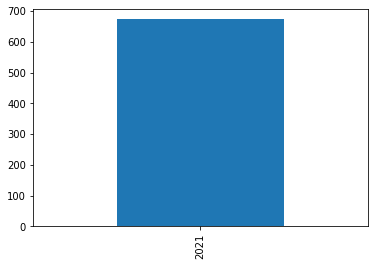

In [123]:
short_tweets['year'].value_counts().plot(kind='bar')

In [124]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [125]:
short_tweets[short_tweets['year']==2021]['text']

0      Experience Kimolos with Aria Hotels! \nEnjoy t...
1      RT @WindyCityGreek: Visiting Veria, Greece’s b...
2              RT @Darmand15766004: #visitGreece #symi  
3             RT @Darmand15766004: #visitGreece #rodos  
4                                  #visitGreece #rodos  
                             ...                        
668    The port of Alonissos at night! Time for a wal...
669    #lightsofmykonos #view #jmk\n\n#mykonos #mikon...
670    He needs to make his house in Greece covid-saf...
671    RT @VisitGreecegr: We have an announcement to ...
672    “If California were an island, it would be Cre...
Name: text, Length: 673, dtype: object

In [126]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
#text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


In [127]:
text = short_tweets[short_tweets['year']==2021]['text'].str.cat(sep = ' ').replace("amp", ' ')


In [128]:
text

'Experience Kimolos with Aria Hotels! \nEnjoy the full video here  .\n.\n#ariahotels #kimolos…   RT @WindyCityGreek: Visiting Veria, Greece’s beautiful historical town   RT @Darmand15766004: #visitGreece #symi   RT @Darmand15766004: #visitGreece #rodos   #visitGreece #rodos   #visitGreece #symi   Visiting Veria, Greece’s beautiful historical town   when there is so much to explore, discover and rediscover, experience and capture from the magical mainland to the…   RT @VisitGreecegr: Nous avons une annonce à te faire. Tout ce que tu veux, c\'est la Grèce. Pas besoin d\'y réfléchir à deux fois. Réserve et… RT @VisitGreecegr: Anafiotika, Athens | A unique island-type of neighbourhood with its whitewashed houses and a bird\'s eye view of Athens,… RT @VisitGreecegr: Good morning from Seal\'s Cave, Peloponnese | Immense serenity and absolute beauty emerge in front of you 💙 \n#VisitGreece… RT @ZanteInformer: Happy Wednesday! Hands up if you\'re about to get on a plane to visit the island! 🇬🇷 

In [129]:
list(STOPWORDS)[0:20]

['each',
 'then',
 'the',
 'through',
 'you',
 'i',
 'about',
 'was',
 'him',
 'both',
 "let's",
 "don't",
 'into',
 'who',
 'shall',
 'been',
 'if',
 'hers',
 'did',
 'can']

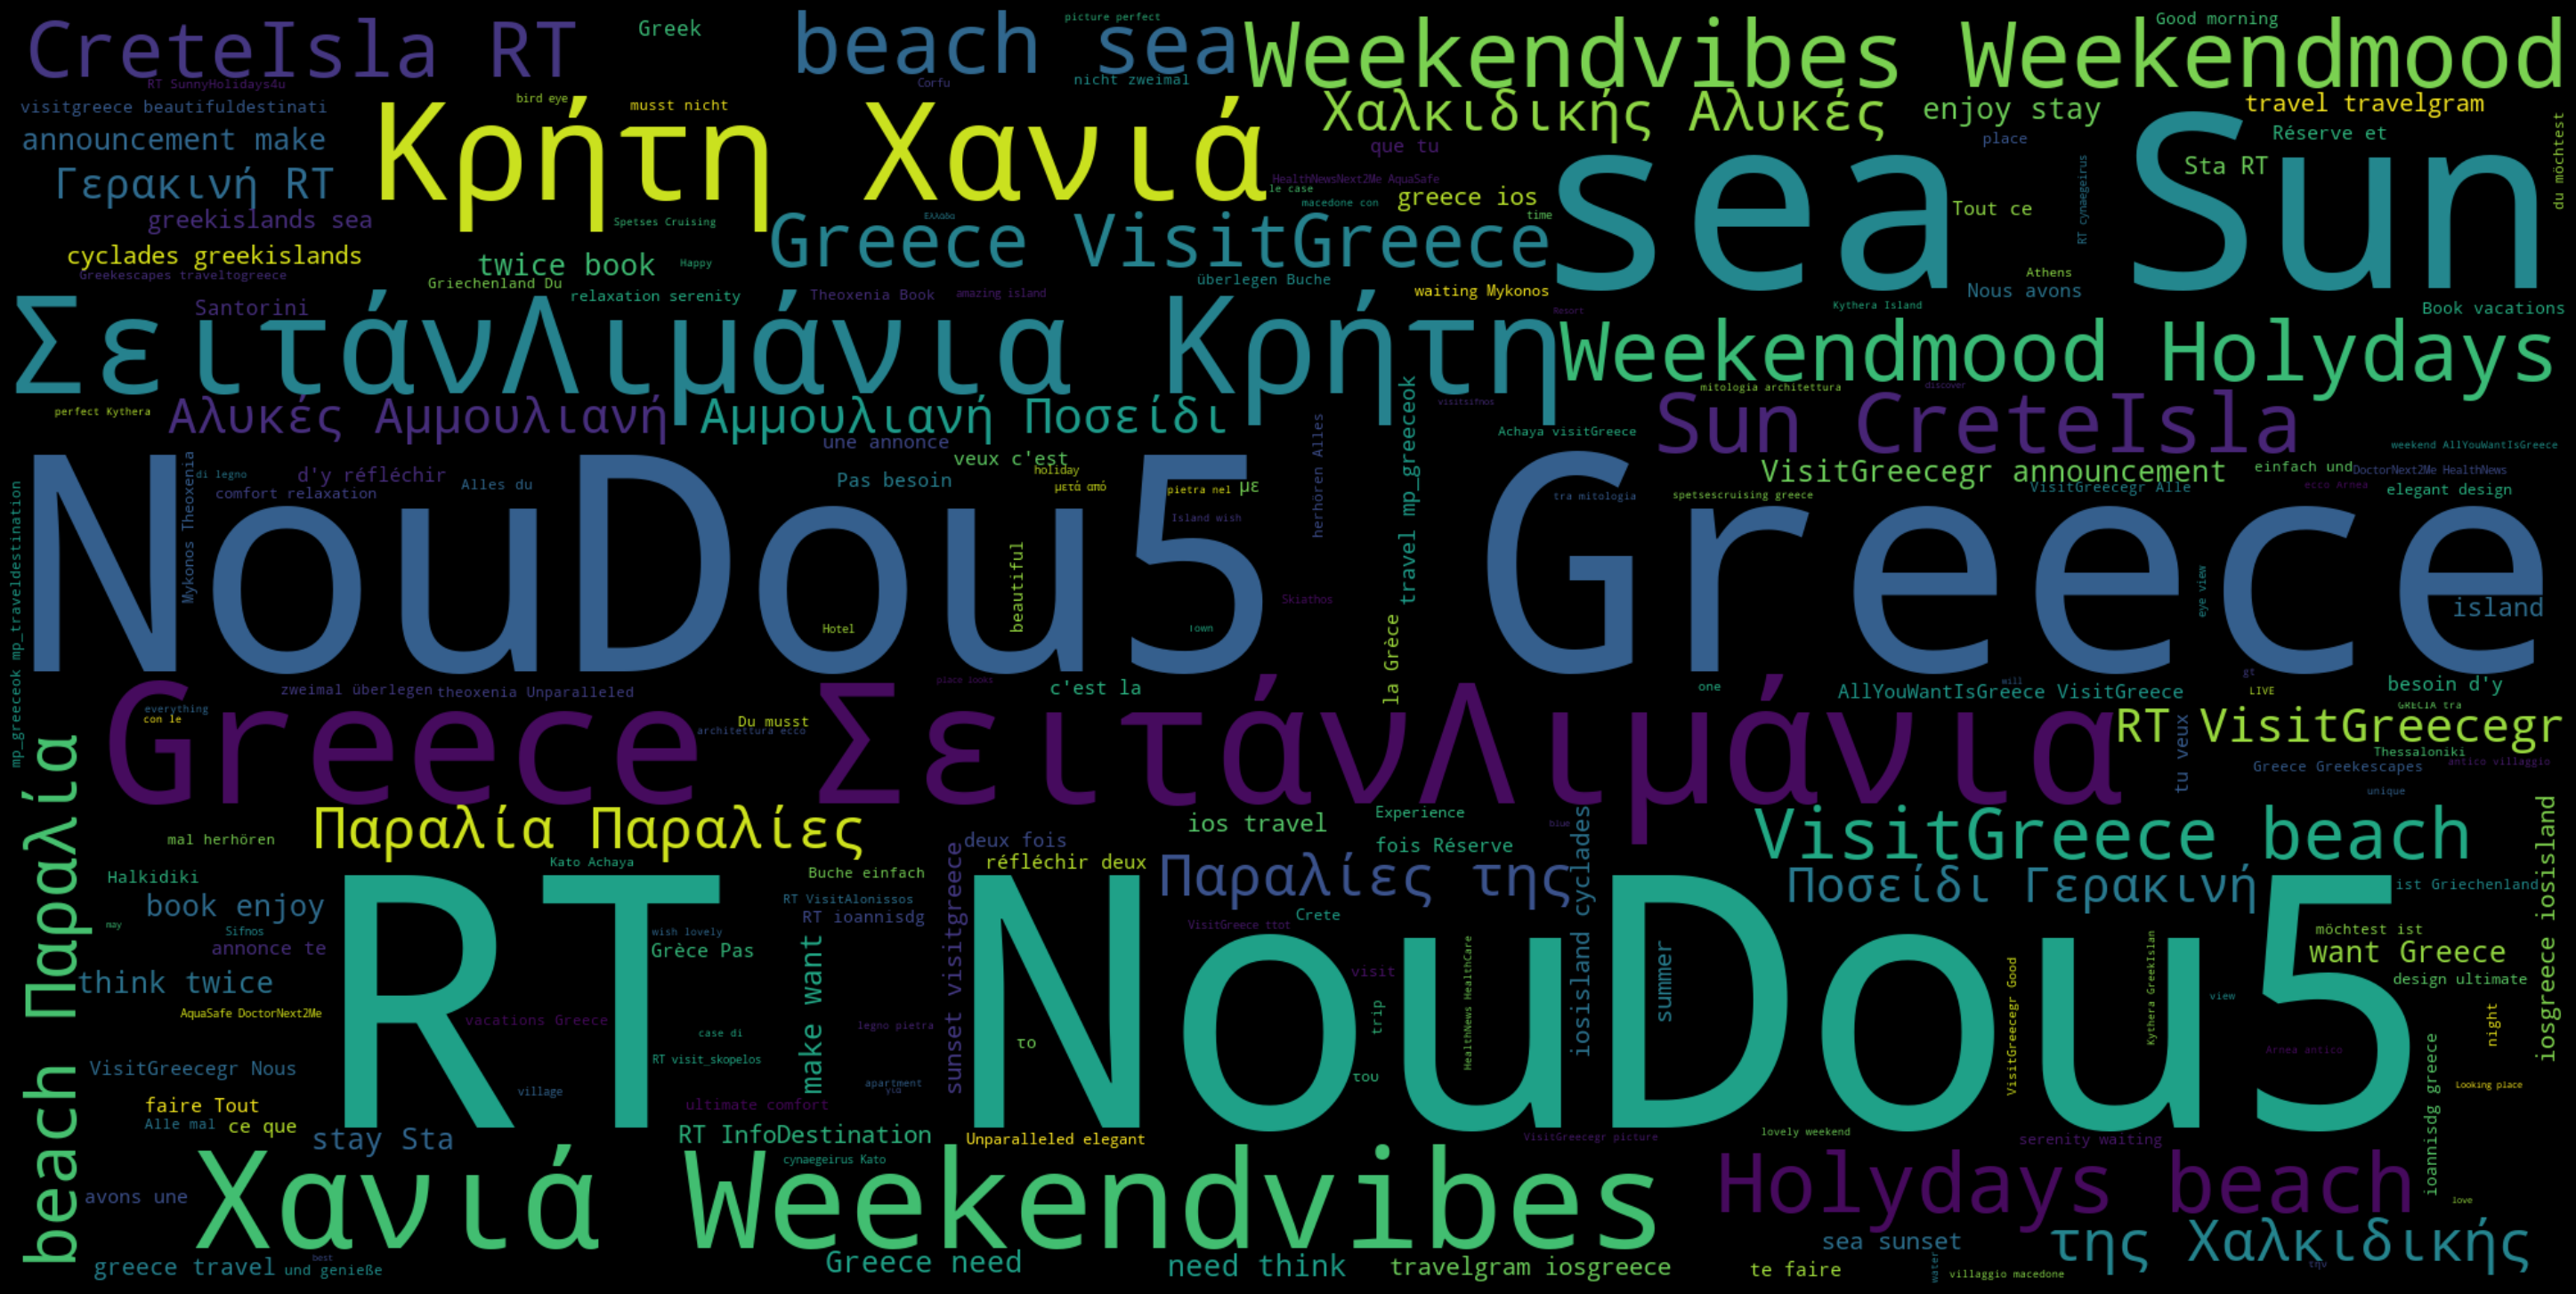

In [130]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας ψάξουμε τα Ελληνικά stopwords.....

In [131]:
import spacy

In [132]:
!python -m spacy download el_core_news_sm

# Επειτα κάνουμε Runtime ->  Restart Runtime, για να δει τις αλλαγές από το download...

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [133]:
nlp = spacy.load('el_core_news_sm')

In [134]:
list(nlp.Defaults.stop_words)[0:20]

['κάμποσων',
 'γι',
 'επίσης',
 'ήταν',
 'εγώ',
 'τούτου',
 'κάτι',
 'ήδη',
 'από',
 'έκαστο',
 'ταύτων',
 'τελευταία',
 'όποιο',
 'τούτους',
 'πρώτο',
 'ολότελα',
 'περισσότερο',
 'μερικών',
 'κατιτί',
 'όποτε']

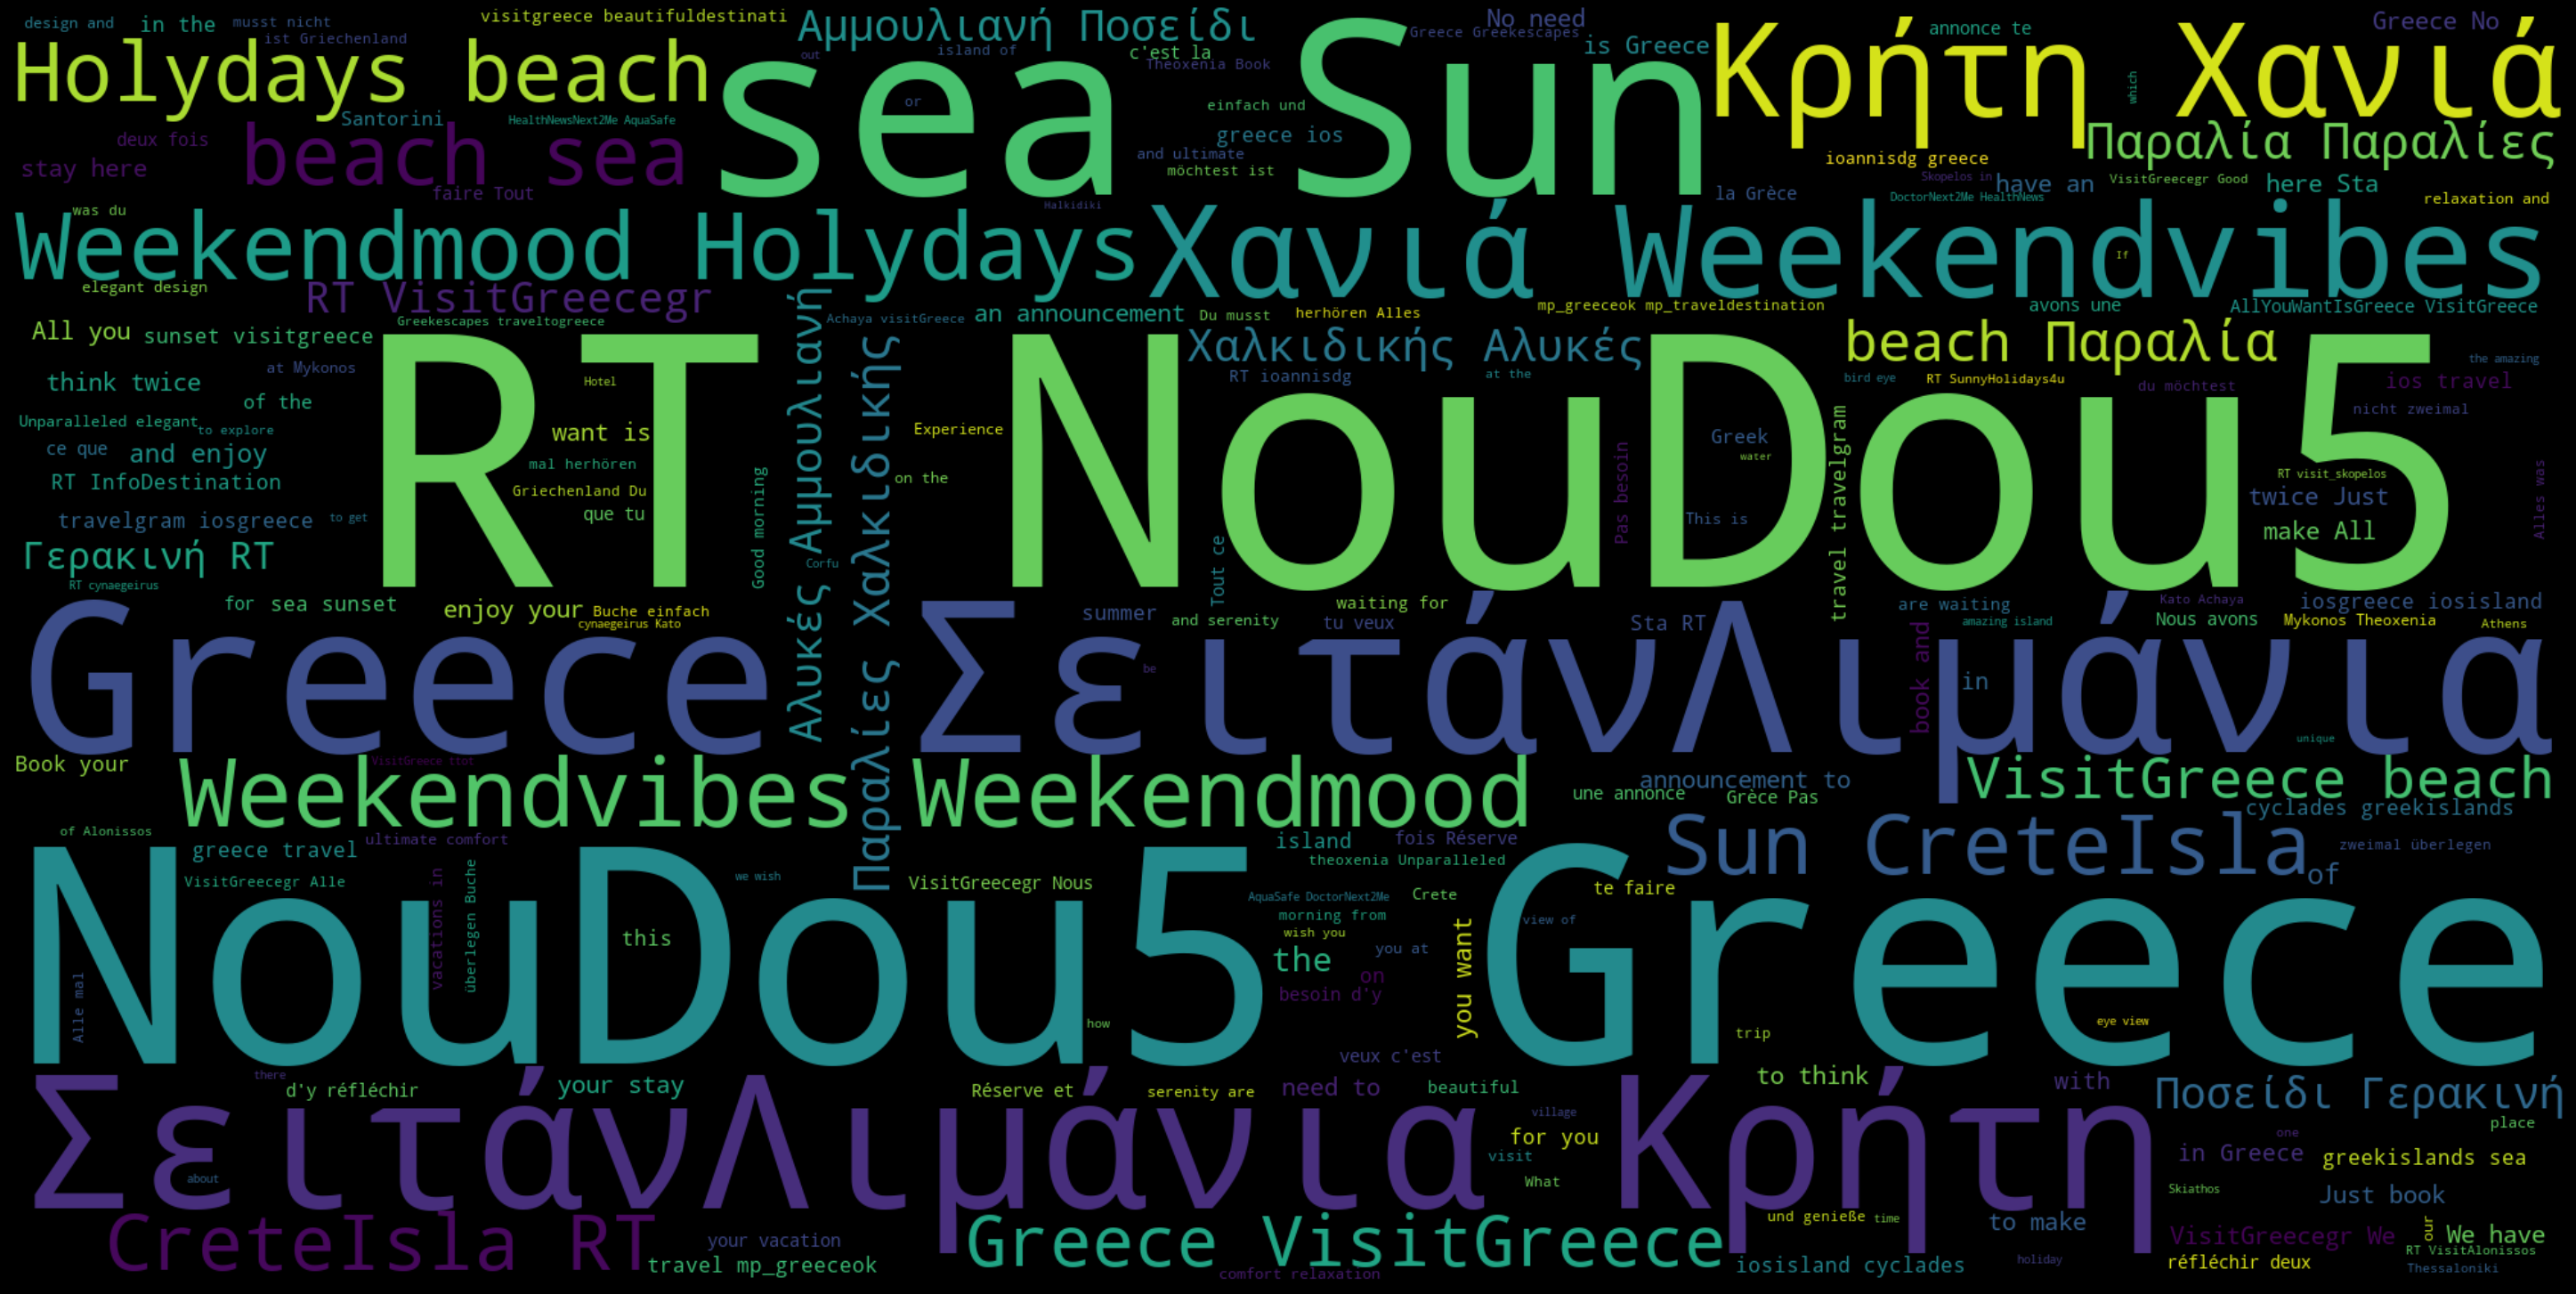

In [135]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο...

In [136]:
doc = nlp(short_tweets['text'][1])

In [137]:
for token in doc:
    print(token, token.lemma_)

RT rt
@WindyCityGreek @windycitygreek
: :
Visiting visiting
Veria veria
, ,
Greece’s greece’s
beautiful beautiful
historical historical
town town
   


In [138]:
' '.join(token.lemma_ for token in doc)

'rt @windycitygreek : visiting veria , greece’s beautiful historical town  '

In [139]:
text

'Experience Kimolos with Aria Hotels! \nEnjoy the full video here  .\n.\n#ariahotels #kimolos…   RT @WindyCityGreek: Visiting Veria, Greece’s beautiful historical town   RT @Darmand15766004: #visitGreece #symi   RT @Darmand15766004: #visitGreece #rodos   #visitGreece #rodos   #visitGreece #symi   Visiting Veria, Greece’s beautiful historical town   when there is so much to explore, discover and rediscover, experience and capture from the magical mainland to the…   RT @VisitGreecegr: Nous avons une annonce à te faire. Tout ce que tu veux, c\'est la Grèce. Pas besoin d\'y réfléchir à deux fois. Réserve et… RT @VisitGreecegr: Anafiotika, Athens | A unique island-type of neighbourhood with its whitewashed houses and a bird\'s eye view of Athens,… RT @VisitGreecegr: Good morning from Seal\'s Cave, Peloponnese | Immense serenity and absolute beauty emerge in front of you 💙 \n#VisitGreece… RT @ZanteInformer: Happy Wednesday! Hands up if you\'re about to get on a plane to visit the island! 🇬🇷 

In [140]:
full_doc = nlp(text)

In [141]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [142]:
clear_text[200:400]

': # visitgreece # symi    rt @Darmand15766004 : # visitgreece # rodos    # visitgreece # rodos    # visitgreece # symi    visiting veria , greece’s beautiful historical town    when there is so much t'

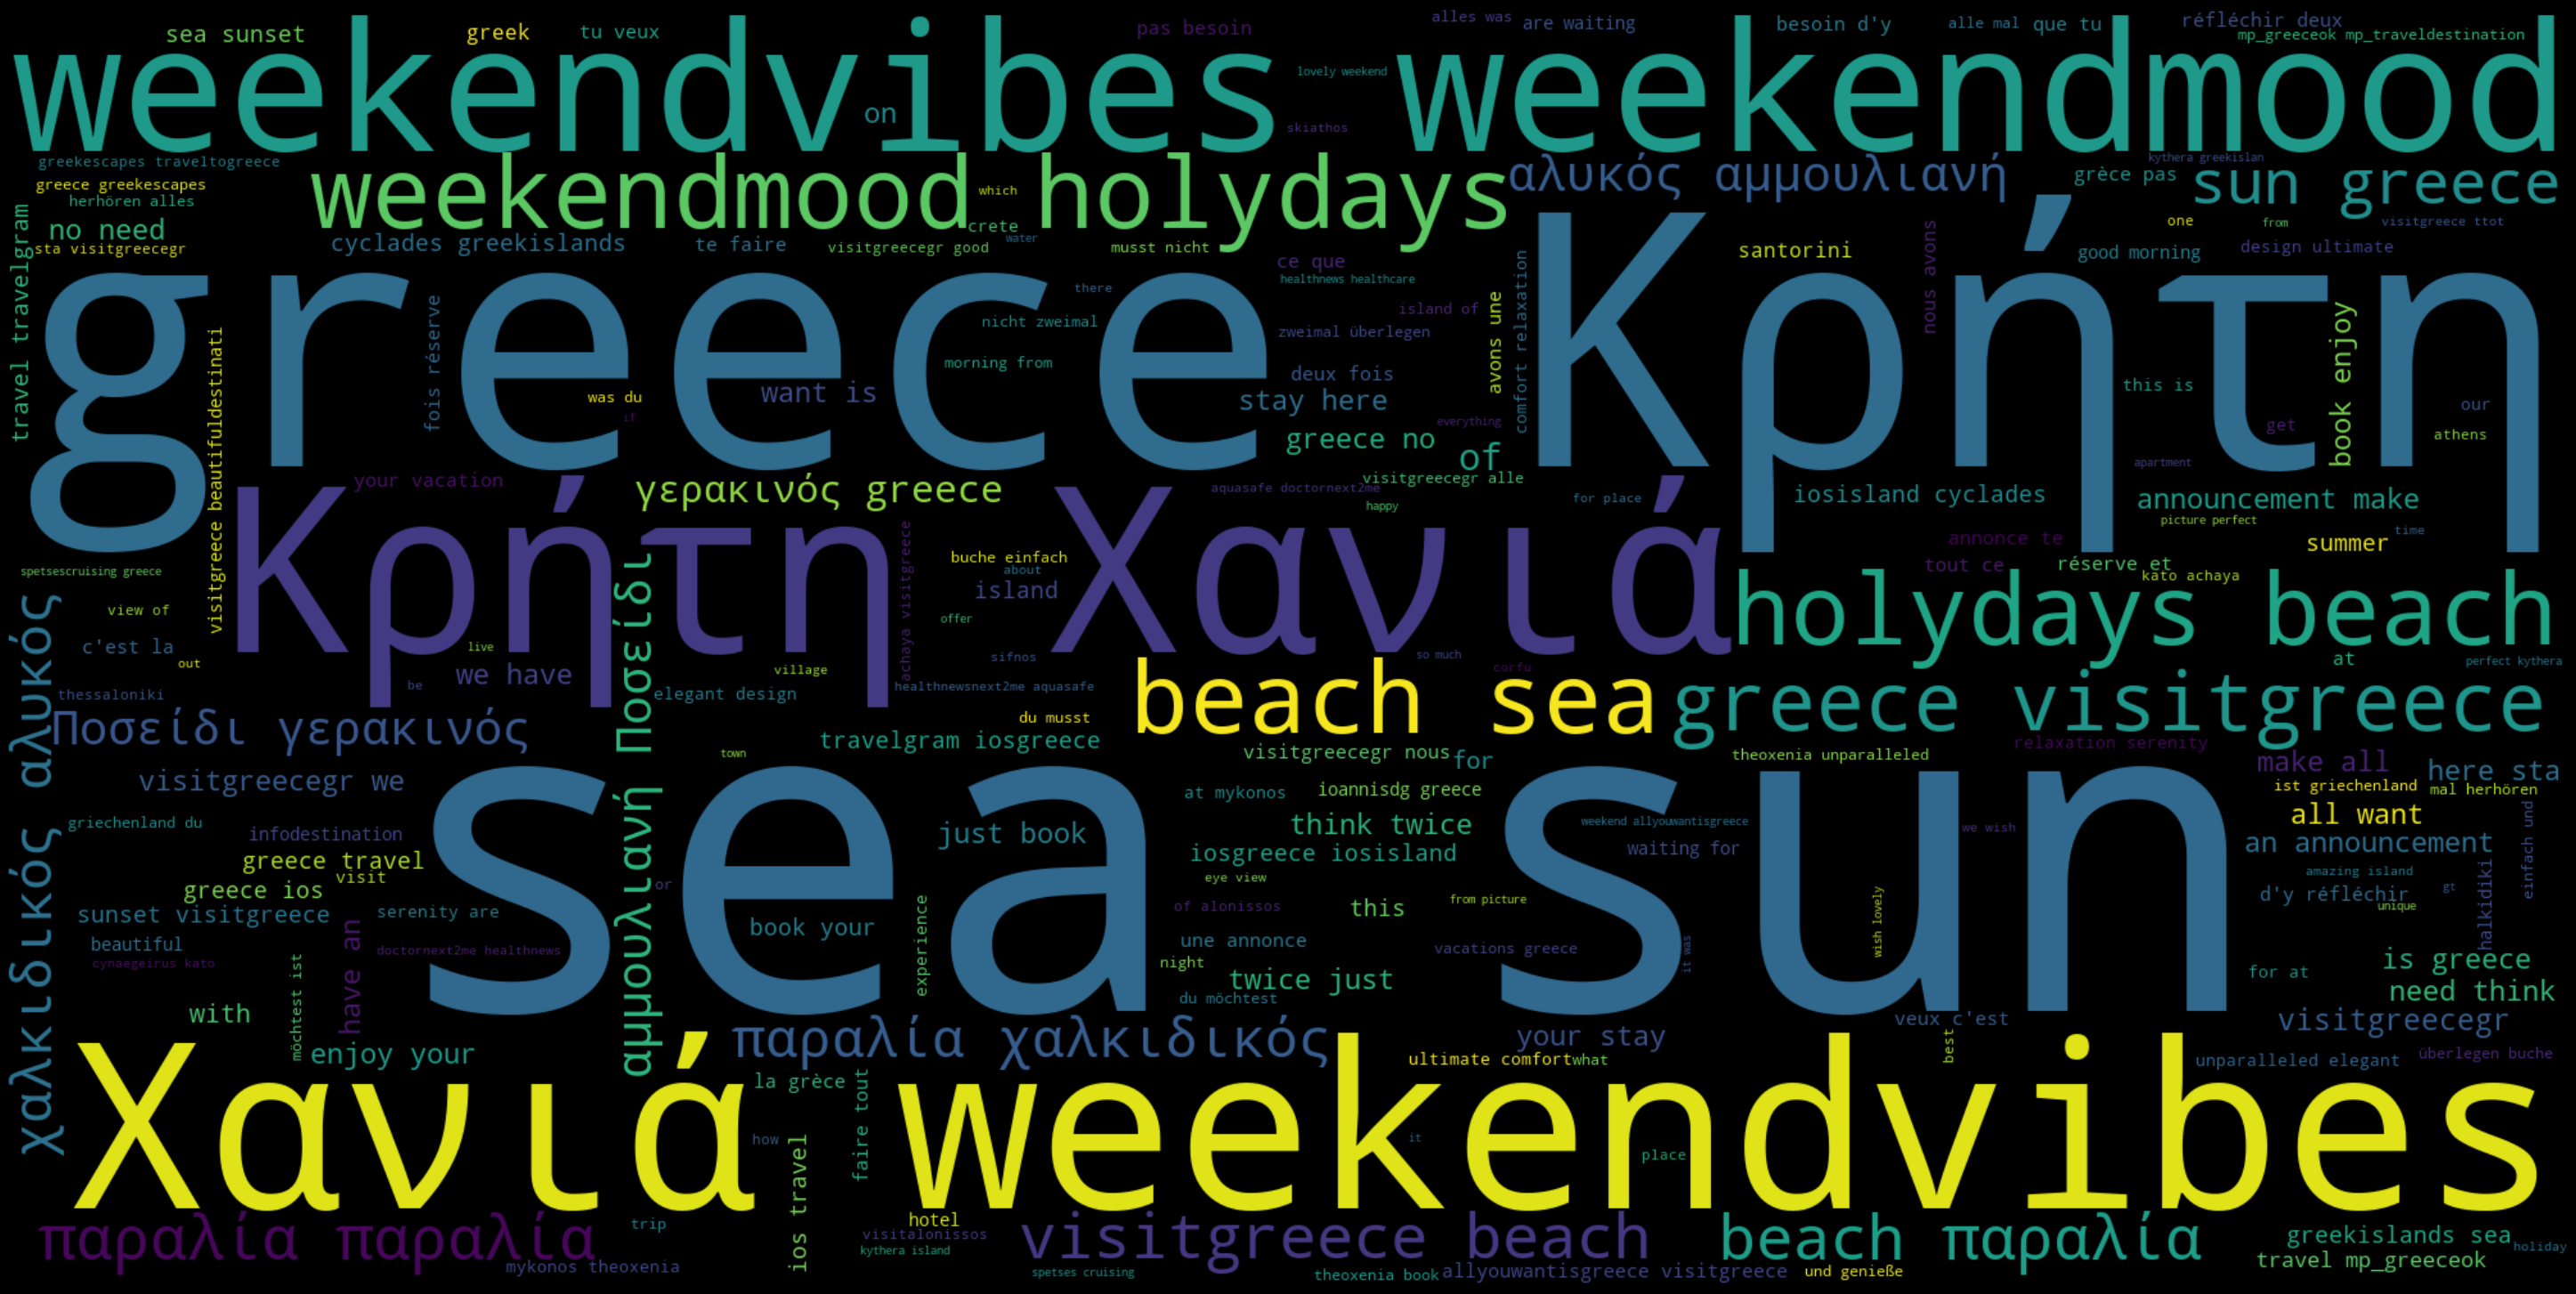

In [189]:
wordcloud = WordCloud(
    stopwords = ['rt', 'noudou5', 'σειτάνλιμάνια', 'the', 'to', 'you', 'in', 'and', 'creteisla'] + list(nlp.Defaults.stop_words),
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Vectorization starts here......

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [145]:
count_vector = cv.fit_transform(short_tweets['text'])

In [146]:
count_vector.shape

(673, 1682)

In [147]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


06  12  14  15  15th  16  1821  ...  ωραιότερες  ως  όλοι  όπως  όχι  ώρα  ώστε
0   0   0   0   0     0   0     0  ...           0   0     0     0    0    0     0
1   0   0   0   0     0   0     0  ...           0   0     0     0    0    0     0
2   0   0   0   0     0   0     0  ...           0   0     0     0    0    0     0
3   0   0   0   0     0   0     0  ...           0   0     0     0    0    0     0
4   0   0   0   0     0   0     0  ...           0   0     0     0    0    0     0

[5 rows x 1682 columns]

In [148]:
#cv.vocabulary_

In [149]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [150]:
count_vector = cv.fit_transform(short_tweets['text'])

In [151]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


about  achaya  agios  all  ...  ποσείδι  σειτάνλιμάνια  χαλκιδικής  χανιά
0      0       0      0    0  ...        0              0           0      0
1      0       0      0    0  ...        0              0           0      0
2      0       0      0    0  ...        0              0           0      0
3      0       0      0    0  ...        0              0           0      0
4      0       0      0    0  ...        0              0           0      0

[5 rows x 199 columns]

In [152]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [153]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_tweets['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετού', 'ετούτε', 'ευθύ', 'εχτέ', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένος', 'ορισμένω', 'ποία', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'τούτε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   ...  @cynaegeirus  ...  σειτάνλιμάνι  χαλκιδικός  χανιά
0      0    0             0  ...             0           0      0
1      0    0             0  ...             0           0      0
2      0    0             0  ...             0           0      0
3      0    0             0  ...             0           0      0
4      0    0             0  ...             0           0      0

[5 rows x 172 columns]

In [154]:
 cv = CountVectorizer( stop_words= ['rt', 'noudou5', 'σειτάνλιμάνια', 'the', 'to', 'you', 'in', 'and', 'creteisla'] + list(nlp.Defaults.stop_words), max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(short_tweets['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()




beach  greece  holydays  is  ...  παραλίες  ποσείδι  χαλκιδικής  χανιά
0      0       0         0   0  ...         0        0           0      0
1      0       1         0   0  ...         0        0           0      0
2      0       0         0   0  ...         0        0           0      0
3      0       0         0   0  ...         0        0           0      0
4      0       0         0   0  ...         0        0           0      0

[5 rows x 20 columns]

In [155]:
common_words=results.sum(axis=0)
common_words.sort_values(ascending=False).head(15)

greece           413
beach            266
visitgreece      217
sea              164
sun              143
weekendvibes     139
holydays         139
χανιά            139
κρήτη            139
weekendmood      139
visitgreecegr    101
παραλία           98
αλυκές            96
αμμουλιανή        96
χαλκιδικής        96
dtype: int64

In [156]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


κυματοθράυστες  κυπριακα  κυπρος
0               0         0       0
1               0         0       0
2               0         0       0
3               0         0       0
4               0         0       0

In [192]:
cv = CountVectorizer( ['rt noudou5', 'noudou5 greece' 'σειτάνλιμάνια', 'the', 'to', 'you', 'in', 'and', 'creteisla'] + list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

beach sea  beach παραλία  ...  χαλκιδικής αλυκές  χανιά weekendvibes
0          0              0  ...                  0                   0
1          0              0  ...                  0                   0
2          0              0  ...                  0                   0
3          0              0  ...                  0                   0
4          0              0  ...                  0                   0

[5 rows x 20 columns]

In [193]:
results.sum(axis =0).sort_values(ascending = False)

rt noudou5                  234
noudou5 greece              233
sea sun                     140
χανιά weekendvibes          139
weekendvibes weekendmood    139
greece σειτάνλιμάνια        139
holydays beach              139
weekendmood holydays        139
beach sea                   139
κρήτη χανιά                 139
σειτάνλιμάνια κρήτη         139
sun creteisla               138
greece visitgreece          106
visitgreece beach            99
αλυκές αμμουλιανή            96
χαλκιδικής αλυκές            96
αμμουλιανή ποσείδι           96
παραλία παραλίες             96
της χαλκιδικής               96
beach παραλία                96
dtype: int64

In [159]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()   


rt noudou5                  234
noudou5 greece              233
sea sun                     140
χανιά weekendvibes          139
weekendvibes weekendmood    139
dtype: int64

In [160]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bcov[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

covid  covid-19  covid-safe
0      0         0           0
1      0         0           0
2      0         0           0
3      0         0           0
4      0         0           0

In [161]:
results.sum(axis =0).sort_values(ascending = False)

covid         4
covid-19      2
covid-safe    1
dtype: int64

In [162]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['covid19', 'τουρισμός']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


covid19  τουρισμός
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [164]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])  #finds the tfidf score with normalization


In [165]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

15  2021   30  854  about  ...  χαλκιδικής  χανιά  χρόνια  χώρα  ωρα
0  0.0   0.0  0.0  0.0    0.0  ...         0.0    0.0     0.0   0.0  0.0
1  0.0   0.0  0.0  0.0    0.0  ...         0.0    0.0     0.0   0.0  0.0
2  0.0   0.0  0.0  0.0    0.0  ...         0.0    0.0     0.0   0.0  0.0
3  0.0   0.0  0.0  0.0    0.0  ...         0.0    0.0     0.0   0.0  0.0
4  0.0   0.0  0.0  0.0    0.0  ...         0.0    0.0     0.0   0.0  0.0

[5 rows x 500 columns]

In [166]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.13330792 0.         0.04975555 0.         0.02573854
  0.02582216 0.         0.         0.         0.         0.
  0.02362962 0.         0.02670661 0.         0.         0.05605338
  0.         0.02581351 0.04085133 0.         0.         0.16786503
  0.         0.         0.0293759  0.         0.         0.
  0.         0.09217395 0.         0.         0.         0.
  0.         0.02728295 0.07722677 0.05414533 0.         0.
  0.08577879 0.         0.         0.         0.         0.
  0.         0.02792222 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.02180467
  0.         0.         0.         0.         0.02421367 0.
  0.         0.         0.         0.         0.         0.
  0.         0.06230261 0.         0.02457361 0.02406719 0.02844204
  0.04025242 0.05125604 0.         0.    

In [167]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.         0.         ... 0.         0.09217395 0.        ]
 [0.         1.         0.03425139 ... 0.02182385 0.02364463 0.01354531]
 [0.         0.03425139 1.         ... 0.07035106 0.01729153 0.04366447]
 ...
 [0.         0.02182385 0.07035106 ... 1.         0.24863926 0.03421481]
 [0.09217395 0.02364463 0.01729153 ... 0.24863926 1.         0.04948728]
 [0.         0.01354531 0.04366447 ... 0.03421481 0.04948728 1.        ]]


In [168]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

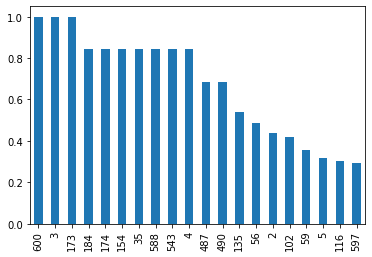

In [169]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [170]:
short_tweets['text'].loc[3]

'RT @Darmand15766004: #visitGreece #rodos  '

In [171]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/visitgreece_search.tsv", sep='\t')

In [172]:
df.head(3)

Unnamed: 0  ... quoted_status
0           0  ...           NaN
1           1  ...           NaN
2           2  ...           NaN

[3 rows x 31 columns]

In [173]:
mean = np.mean(df['retweet_count'])

In [174]:
print("Ο Μέσος Όρος των retweets: {}".format(mean))

Ο Μέσος Όρος των retweets: 52.658246656760774


In [175]:
df.dtypes

Unnamed: 0                     int64
created_at                    object
id                             int64
id_str                         int64
text                          object
truncated                       bool
entities                      object
metadata                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str    float64
in_reply_to_user_id          float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                 float64
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
possibly_sensitive            object
lang                          object
retweeted_status              object
e

In [176]:
fav_max = np.max(df['favorite_count'])

In [177]:
fav = df[df.favorite_count == fav_max].index[0]

In [178]:
print("Το Tweet με τα πιο πολλά like είναι: \n{}".format(df['text'][fav]))
print("Αριθμός των likes: {}".format(fav_max))

Το Tweet με τα πιο πολλά like είναι: 
#Greece 🇬🇷 🇪🇺   🌊🏊‍♀️🏄‍♂️⛱️☀️
#ΣειτάνΛιμάνια #Κρήτη #Χανιά
#Weekendvibes #Weekendmood
#Holydays  #beach  #sea  #Sun… https://t.co/suZId795N0
Αριθμός των likes: 265


In [179]:
df = df.replace(np.nan, '0')

In [180]:
df['created_at'] =  pd.to_datetime(df['created_at'] )

In [181]:
tret = pd.Series(df['retweet_count'].values, index=df['created_at'])
tfav = pd.Series(df['favorite_count'].values, index=df['created_at'])

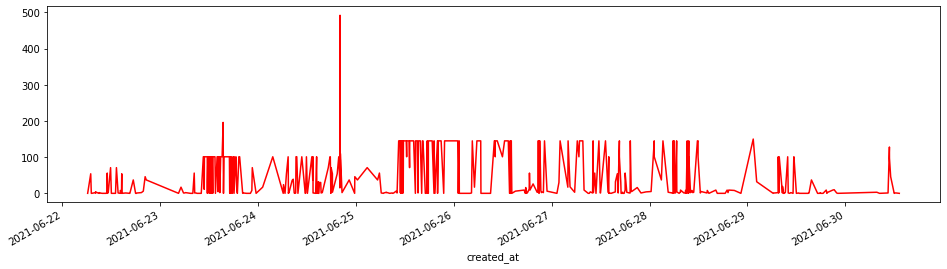

In [182]:
tret.plot(figsize=(16,4), color='r'); 

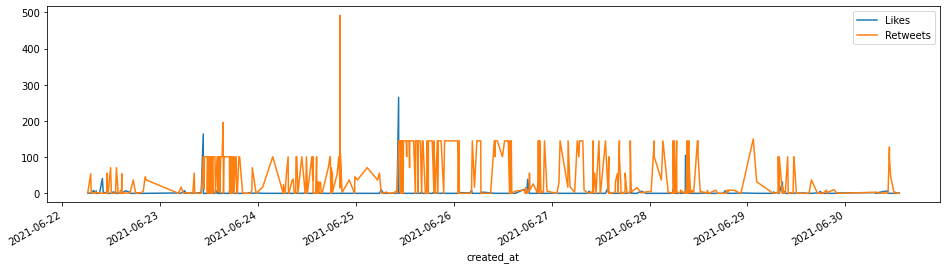

In [183]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [184]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [185]:
df['SA'] = np.array([ analize_sentiment(tweet) for tweet in df['text'] ])

display(df.head(10)) 

Unnamed: 0  ... SA
0           0  ...  1
1           1  ...  1
2           2  ...  0
3           3  ...  0
4           4  ...  0
5           5  ...  0
6           6  ...  1
7           7  ...  1
8           8  ...  0
9           9  ...  1

[10 rows x 32 columns]

In [186]:
pos_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['text']) if df['SA'][index] < 0]

In [187]:
print("Ποσοστό θετικών tweets: {}%".format(len(pos_tweets)*100/len(df['text'])))
print("Ποσοστό ουδέτερων tweets: {}%".format(len(neu_tweets)*100/len(df['text'])))
print("Ποσοστό αρνητικών tweets: {}%".format(len(neg_tweets)*100/len(df['text'])))

Ποσοστό θετικών tweets: 30.163447251114412%
Ποσοστό ουδέτερων tweets: 67.75631500742942%
Ποσοστό αρνητικών tweets: 2.0802377414561666%
